In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
file_path = "buoy44011_7_2024.txt"

col_names = ["YY", "MM", "DD", "hh", "mm", "WDIR", "WSPD", "GST", "WVHT", "DPD", "APD", "MWD", "PRES", "ATMP", "WTMP", "DEWP", "VIS", "TIDE"]
data = pd.read_csv(file_path, delim_whitespace=True, names=col_names, comment='#')

In [5]:
data

,YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,2024,7,1,0,0,191,7.2,8.4,99.00,99.00,99.00,999,1014.0,18.1,14.5,18.1,99.0,99.0
1,2024,7,1,0,10,193,7.4,9.2,1.14,5.56,4.66,68,1014.1,18.2,14.5,18.2,99.0,99.0
2,2024,7,1,0,20,192,7.3,8.5,99.00,99.00,99.00,999,1014.0,18.2,14.5,18.2,99.0,99.0
3,2024,7,1,0,30,190,7.1,8.4,99.00,99.00,99.00,999,1013.8,18.1,14.5,18.1,99.0,99.0
4,2024,7,1,0,40,192,7.3,8.8,1.30,5.26,4.72,91,1014.1,18.1,14.5,18.1,99.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4459,2024,7,31,23,10,177,5.1,5.9,1.35,5.56,4.96,173,1017.6,22.2,18.9,21.5,99.0,99.0
4460,2024,7,31,23,20,177,4.9,5.7,99.00,99.00,99.00,999,1017.7,22.2,19.0,21.5,99.0,99.0
4461,2024,7,31,23,30,171,4.8,5.5,99.00,99.00,99.00,999,1017.6,22.1,19.1,21.4,99.0,99.0
4462,2024,7,31,23,40,164,4.7,5.4,1.27,5.00,4.89,171,1017.6,22.0,19.2,21.3,99.0,99.0


In [7]:

data['datetime'] = pd.to_datetime(data[['YY', 'MM', 'DD', 'hh', 'mm']].rename(columns={'YY': 'year', 'MM': 'month', 'DD': 'day', 'hh': 'hour', 'mm': 'minute'}))

In [12]:
data.replace(999.0, np.nan, inplace=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


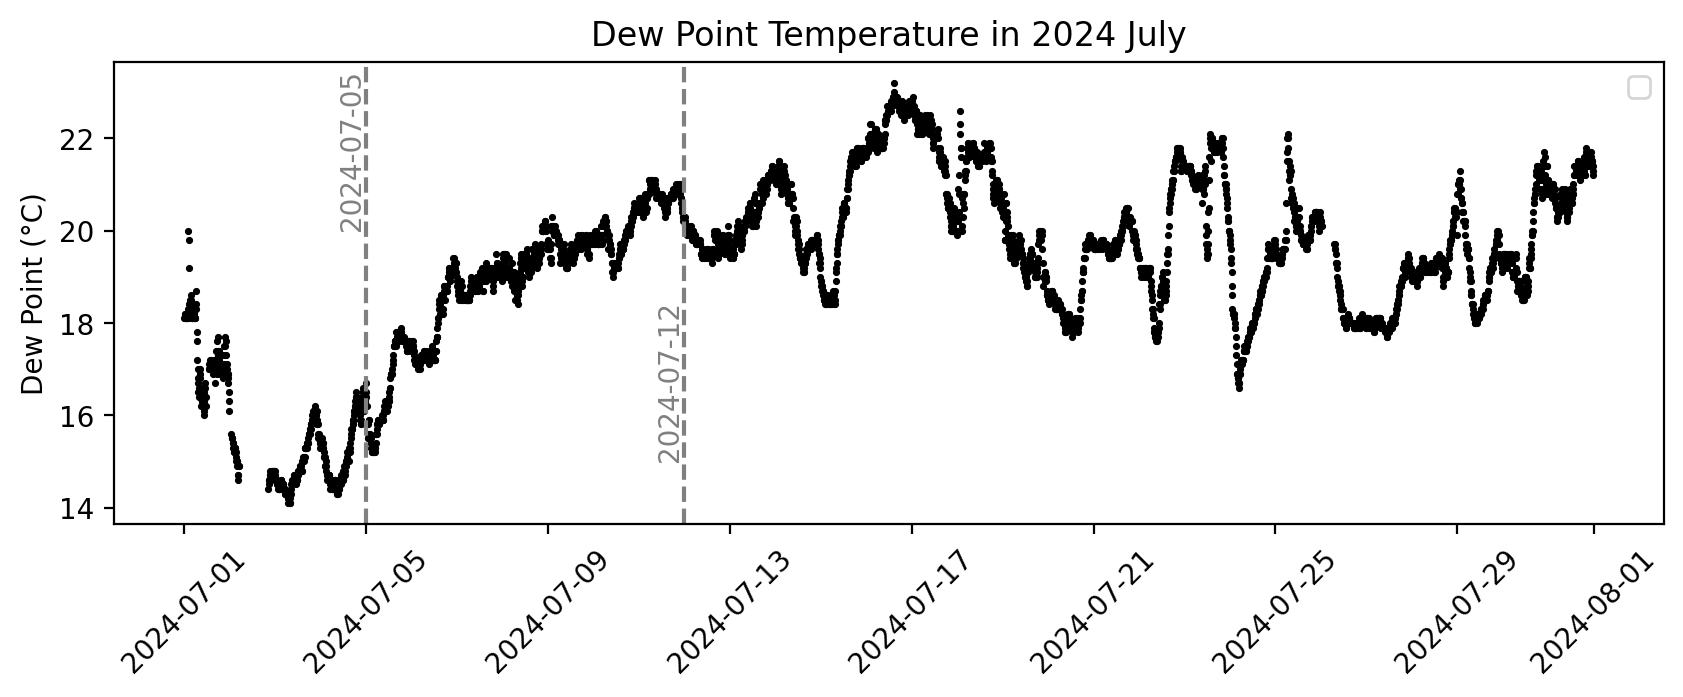

In [45]:
# Plot the DEWP variable
date_1 = pd.to_datetime('2024-07-05')
date_2 = pd.to_datetime('2024-07-12')

fig = plt.figure(figsize=(10, 3))
plt.scatter(data['datetime'], data['DEWP'], c='black', s=2.5)

plt.axvline(x=date_1, color='grey', linestyle='--')
plt.axvline(x=date_2, color='grey', linestyle='--')

plt.text(date_1, 20, '2024-07-05', color='grey', ha='right', va='bottom', fontsize=10, rotation=90)
plt.text(date_2, 15, '2024-07-12', color='grey', ha='right', va='bottom', fontsize=10, rotation=90)

plt.ylabel('Dew Point (°C)')
plt.title('Dew Point Temperature in 2024 July')
plt.xticks(rotation=45)
plt.legend()
fig.set_dpi(200)
plt.show()